# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Create a text file for the summary analysis and conclusions - Is this needed?
#file_to_output = os.path.join(".", "Analysis","Pymaceuticals_analysis.txt")

# Study data files 
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Create the dataframe called mouse_data_complete.  This dataframe has all data from both original csv metadata files
#Output shows the top 5 rows and last 5 rows of the datas
mousestudy_data_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousestudy_data_complete_df

# print(mousestudy_data_complete_df.columns) - use this to check the spelling and names of all the columns in the 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(mousestudy_data_complete_df["Mouse ID"].unique())

249

In [12]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mousestudy_data_complete_df.loc[mousestudy_data_complete_df.duplicated(subset=["Mouse ID", "Timepoint"])]

# This output shows that mouse ID g989 had duplicated data, that is multiple rows of data reported for all the columns

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Question to reviewer -- The homework original jupyter notebook showed this response as array([]g989'], dtype=object.  My code returns the dtype as string.  Is this the same thing?

# Check for duplicate timepoints for each ID
duplicates = mousestudy_data_complete_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Filter the dataframe to only include the duplicated timepoints
duplicate_data = mousestudy_data_complete_df[duplicates]

# Get the unique IDs with duplicates
duplicate_ids = duplicate_data['Mouse ID'].unique()

# Return the list of duplicate IDs and their data type
print(duplicate_ids, type(duplicate_ids[0]))

['g989'] <class 'str'>


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 

# Define the Mouse ID for which you want to print the all the rows of data
target_id = 'g989'

# Filter the dataframe to only include the rows with the target Mouse ID
target_rows = mousestudy_data_complete_df[mousestudy_data_complete_df['Mouse ID'] == 'g989']

# Print the rows with the target ID
print(target_rows)

# THis prints all the duplicate data and the non-duplicated data for all timepoints for the Mouse ID g989

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = mousestudy_data_complete_df[mousestudy_data_complete_df['Mouse ID'] != 'g989']
print(clean_data)
# 1880 is the expected numebr of rows.  That is the full 1893 rows minus the 13 rows (duplicated and not duplicated)



     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [17]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

# This is the full number of subjects (249) minus the 1 excluded mouse.


248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the "clean_data" dataframe by drug Regimen
grouped = clean_data.groupby('Drug Regimen')

# Calculate summary statistics for each drug regimen
summary_tumorvolume = grouped['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, pd.Series.sem])

# Rename the columns
summary_tumorvolume.rename(columns={'mean': 'Mean',
                        'median': 'Median',
                        'var': 'Variance',
                        'std': 'Standard Deviation',
                        'sem': 'Standard Error of the Mean'}, inplace=True)

print(summary_tumorvolume)

                   Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.320930  50.446266  43.852013            6.622085   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error of the Mean  
Drug Regimen                              
Capomulin                       0.329346  
Ceftamin                        0.469821  

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

# Group the "clean_data" dataframe by drug Regimen
grouped = clean_data.groupby('Drug Regimen')

# Calculate mean, median, and variance for the 'Volume' field
mean = clean_data['Tumor Volume (mm3)'].mean()
median = clean_data['Tumor Volume (mm3)'].median()
variance = clean_data['Tumor Volume (mm3)'].var()
stddev = clean_data['Tumor Volume (mm3)'].std()
sem = clean_data['Tumor Volume (mm3)'].sem()

print("Mean:", mean, "Median:", median, "Variance:", variance, "Standard Deviation:", stddev, "Standard Error of the Mean:",sem)

Mean: 50.43529323225532 Median: 48.933453655 Variance: 79.46290714557321 Standard Deviation: 8.91419694339166 Standard Error of the Mean: 0.20559062186986257


## Bar and Pie Charts

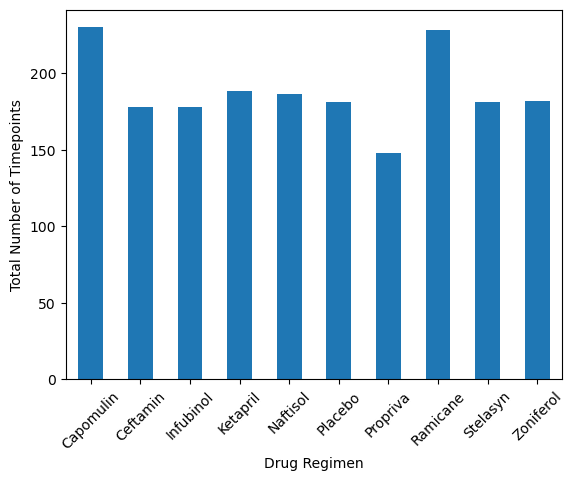

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group the dataframe by 'Drug Regimen' and calculate the total number of timepoints for each Regimen
grouped = clean_data.groupby('Drug Regimen')
group_count = grouped['Mouse ID'].count()

# Plot the bar plot
group_count.plot(kind='bar')

# Add x and y labels
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

# rotate the x-axis labels by 45 degrees to make the graph easier to read
plt.xticks(rotation=45)


# Show the plot
plt.show()


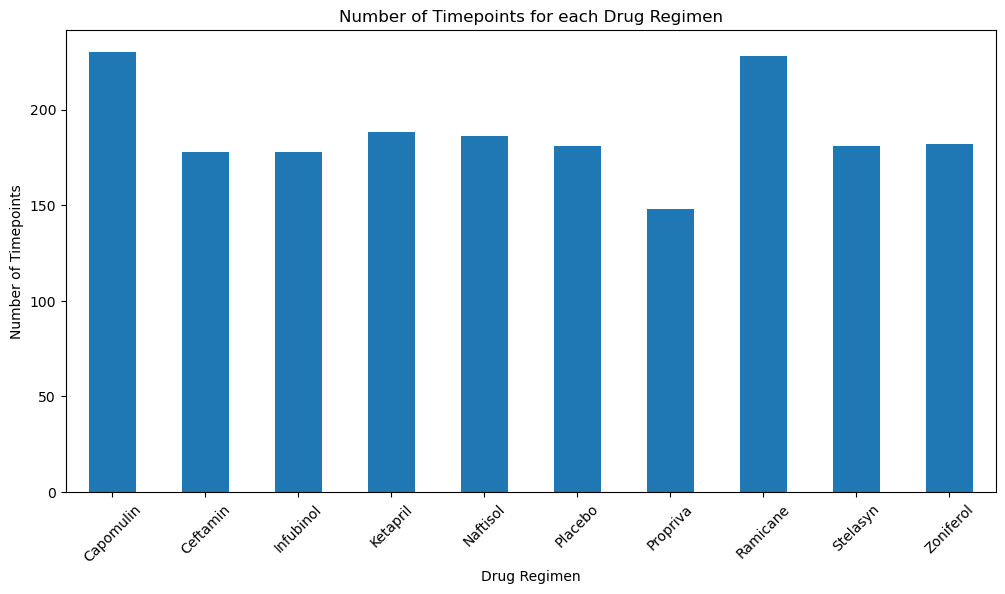

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

grouped = clean_data.groupby(['Drug Regimen'])

# Count the number of timepoints for each drug group
counts = grouped['Timepoint'].count()

# Plot the counts as a bar plot
counts.plot(kind='bar', figsize=(12,6))

# Add a title and labels to the plot
plt.title("Number of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

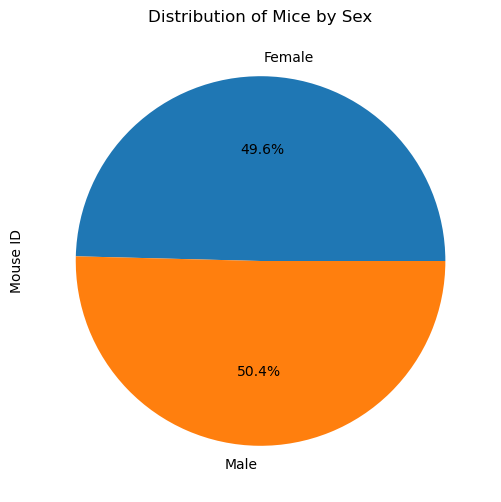

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by the 'Sex' field
grouped = clean_data.groupby(['Sex'])

# Count the number of IDs for each sex group
counts = grouped['Mouse ID'].nunique()

# Plot the counts as a pie plot
counts.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%')

# Add a title to the plot
plt.title("Distribution of Mice by Sex")

# Show the plot
plt.show()


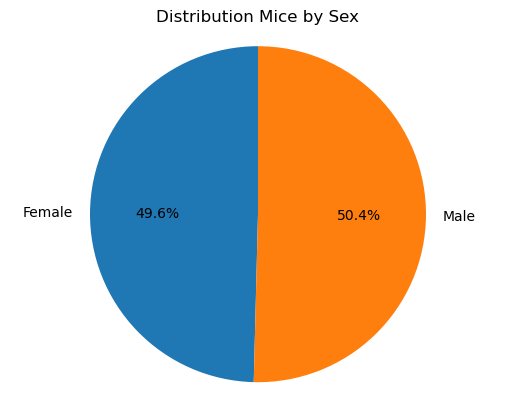

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by the 'Sex' field
grouped = clean_data.groupby(['Sex'])

# Count the number of IDs for each sex group
counts = grouped['Mouse ID'].nunique()

# Plot the counts as a pie plot
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the plot
plt.title("Distribution Mice by Sex")

# Set the aspect ratio of the plot to equal
plt.axis('equal')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# look for every timepoint for every mouse ID and then return teh maximum only (last row below)

# mouse_ids = list(clean_data["Mouse ID"].unique()
df_max_times = clean_data.groupby(["Mouse ID"])['Timepoint'].max()

df_max_times = df_max_times.reset_index()
                 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Show subset data frame smaller from the original bigger dataframe.  Only merge on the columns listed. left means prioritize first dataframe seen on the left of the sentence (how method)
# The instruction below said to use the "original" dataframe so that is 249 mice.  This is not from the reduced clean_data df.
final_output_alldrugs = df_max_times.merge(mousestudy_data_complete_df,on=["Mouse ID", "Timepoint"],how="left")
                 
final_output_alldrugs = final_output_alldrugs.rename(columns={"Tumor Volume (mm3)":"Final Tumor Vol"})


print("\n\nFinal Tumor Volume for All Drugs")
display(final_output_alldrugs)

print("\n\nFinal Tumor Volume for Capomulin, Ramicane, Infubinol and Ceftamin Groups")
final_output_4drugs = final_output_alldrugs[final_output_alldrugs["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
final_output_4drugs

# this should print fewer than the total of 249 mice because not all the mice were on the 4 drug regimens in the question.




Final Tumor Volume for All Drugs


,Mouse ID,Timepoint,Final Tumor Vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29




Final Tumor Volume for Capomulin, Ramicane, Infubinol and Ceftamin Groups


,Mouse ID,Timepoint,Final Tumor Vol,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [30]:
print("\nNumber of mice per treatment group")
display(final_output_alldrugs.groupby("Drug Regimen").count().loc[["Capomulin","Ramicane","Infubinol","Ceftamin"]]
["Mouse ID"].to_frame())


Number of mice per treatment group


,Mouse ID
Drug Regimen,
Capomulin,25
Ramicane,25
Infubinol,25
Ceftamin,25


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volData = []
outlier_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatment:
       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_drug = final_output_alldrugs.loc[final_output_alldrugs["Drug Regimen"]== drug,"Final Tumor Vol"]
    quartile = max_drug.quantile([.25,.5,.75])
    lower_quartile = quartile[0.25]
    upper_quartile = quartile[0.75]
    IQR = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*IQR)
    upper_bound = upper_quartile + (1.5*IQR)
    outlier_list.append((lower_bound, upper_bound))
    print(f"\nThe lower quartile for Final Tumor Vol {drug} is: {lower_quartile:.2f}")
    print(f"The upper quartile for Final Tumor Vol {drug} is: {upper_quartile:.2f}")
    print(f"The interquartile for Final Tumor Vol {drug} is: {IQR:.2f}")
    print(f"The the median of Final Tumor Vol for {drug} is: {quartile[0.5]:.2f} ")
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.\n")


The lower quartile for Final Tumor Vol Capomulin is: 32.38
The upper quartile for Final Tumor Vol Capomulin is: 40.16
The interquartile for Final Tumor Vol Capomulin is: 7.78
The the median of Final Tumor Vol for Capomulin is: 38.13 
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.


The lower quartile for Final Tumor Vol Ramicane is: 31.56
The upper quartile for Final Tumor Vol Ramicane is: 40.66
The interquartile for Final Tumor Vol Ramicane is: 9.10
The the median of Final Tumor Vol for Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


The lower quartile for Final Tumor Vol Infubinol is: 54.05
The upper quartile for Final Tumor Vol Infubinol is: 65.53
The interquartile for Final Tumor Vol Infubinol is: 11.48
The the median of Final Tumor Vol for Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


The lower quartile for Final Tumor Vol Ceftamin is: 48.72
The uppe

In [32]:
# each drug has a place in the index.  Capmulin is #1, Ramicane is # 2, etc
# print the lower bound and upper bound for each drug
# create drug_treatment.index to use later when we call on this code for the drug names
for index,value in enumerate(outlier_list):
    print(index,value)

0 (20.70456164999999, 51.83201549)
1 (17.912664470000003, 54.30681135)
2 (36.83290494999999, 82.74144559000001)
3 (25.355449580000002, 87.66645829999999)


In [33]:
drug_treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# lower bound is #1 in the enumerated outlier list.  Upper bound is #2 in the enumerated outlier list.
for index, value in enumerate(outlier_list):
    lower_bound = value[0]
    upper_bound = value[1]
    
    df_temp_find_drug = final_output_alldrugs[final_output_alldrugs["Drug Regimen"] == drug_treatment[index]]
    final_vol_outlier = (df_temp_find_drug["Final Tumor Vol"] < lower_bound) | (df_temp_find_drug["Final Tumor Vol"] > upper_bound) 
    print(f"===========================================================================\n\nDrug Regimen: {drug_treatment[index]} \n")
    print(f"Values below {lower_bound:.2f} or values above {upper_bound:.2f} could be outliers.")
    print(f"Number of potential outliers: {df_temp_find_drug[final_vol_outlier]['Mouse ID'].count()}")

    # double brackets.  outside brackets is becasue we select column.  Inside brackets is to select list.
    print(f"{drug_treatment[index]}'s potential outliers: {df_temp_find_drug[final_vol_outlier]['Final Tumor Vol']}")
    
    
# print("Capomulin's potential outliers: ",df_temp_find_drug[final_vol_outlier]["Final Tumor Vol"])
    



Drug Regimen: Capomulin 

Values below 20.70 or values above 51.83 could be outliers.
Number of potential outliers: 0
Capomulin's potential outliers: Series([], Name: Final Tumor Vol, dtype: float64)

Drug Regimen: Ramicane 

Values below 17.91 or values above 54.31 could be outliers.
Number of potential outliers: 0
Ramicane's potential outliers: Series([], Name: Final Tumor Vol, dtype: float64)

Drug Regimen: Infubinol 

Values below 36.83 or values above 82.74 could be outliers.
Number of potential outliers: 1
Infubinol's potential outliers: 31    36.321346
Name: Final Tumor Vol, dtype: float64

Drug Regimen: Ceftamin 

Values below 25.36 or values above 87.67 could be outliers.
Number of potential outliers: 0
Ceftamin's potential outliers: Series([], Name: Final Tumor Vol, dtype: float64)


C:\Users\Sana Ayubzai\AppData\Local\Temp\ipykernel_808\1938918054.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(final_vol_dictionary.keys())


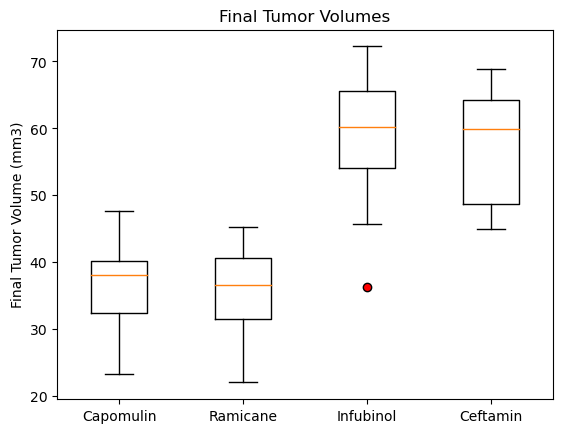

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# create a drug dictionary to include 4 lists

drug1=final_output_4drugs[final_output_4drugs["Drug Regimen"]=="Capomulin"]["Final Tumor Vol"]
drug2=final_output_4drugs[final_output_4drugs["Drug Regimen"]=="Ramicane"]["Final Tumor Vol"]
drug3=final_output_4drugs[final_output_4drugs["Drug Regimen"]=="Infubinol"]["Final Tumor Vol"]
drug4=final_output_4drugs[final_output_4drugs["Drug Regimen"]=="Ceftamin"]["Final Tumor Vol"]
final_vol_dictionary={"Capomulin":drug1,"Ramicane":drug2,"Infubinol":drug3,"Ceftamin":drug4}

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Final Tumor Volume (mm3)')

# keys are the drug names
ax1.set_xticklabels(final_vol_dictionary.keys())
outlier = dict(markerfacecolor='red')

# values are the tumor volumes from the dictionary
bp = ax1.boxplot(final_vol_dictionary.values(), flierprops=outlier)
plt.show()



## Line and Scatter Plots

C:\Users\Sana Ayubzai\AppData\Local\Temp\ipykernel_808\3508152028.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = capomulin_data.groupby('Mouse ID').mean().reset_index()


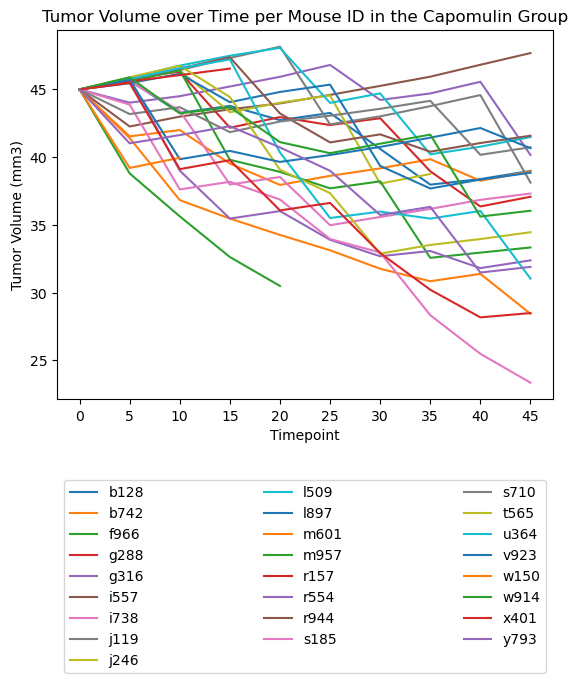

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Version 1

# This code is for a graph that shows the tumor volume of EVERY MOUSE INDIVIDUALLY IN THE CAPOMULIN GROUP vs timepoint

capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

grouped_data = capomulin_data.groupby('Mouse ID').mean().reset_index()

for mouseid in grouped_data['Mouse ID']:
    data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouseid]
    plt.plot(data['Timepoint'], data['Tumor Volume (mm3)'], label=mouseid)
    
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time per Mouse ID in the Capomulin Group')

plt.legend()
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])


# Place the legend that includes all the Mouse IDs outside of the plot 
legend = plt.legend(bbox_to_anchor=(0, -0.4, 1, 0.2), loc='upper left', mode='expand', ncol=3)

plt.show()

C:\Users\Sana Ayubzai\AppData\Local\Temp\ipykernel_808\322160310.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_timepoint = capomulin_datamean.groupby('Timepoint').mean().reset_index()


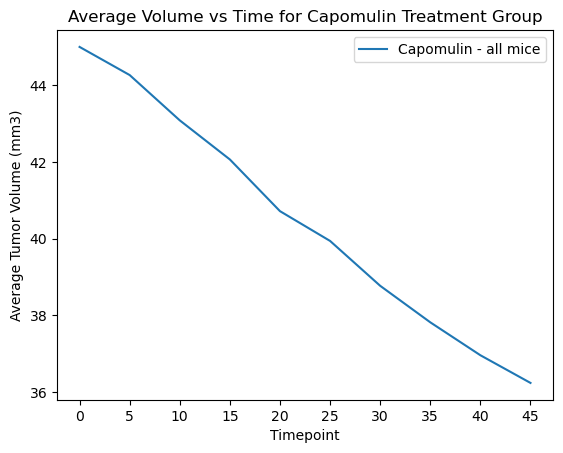

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Version 2

# This code is for a graph that shows the AVERAGE TUMOR VOLUME vs timepoint for all mice treated with Capomulin

capomulin_datamean = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_timepoint = capomulin_datamean.groupby('Timepoint').mean().reset_index()

plt.plot(capomulin_timepoint['Timepoint'], capomulin_timepoint['Tumor Volume (mm3)'], label='Capomulin - all mice')
plt.xlabel('Timepoint')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Volume vs Time for Capomulin Treatment Group')
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

plt.legend()
plt.show()

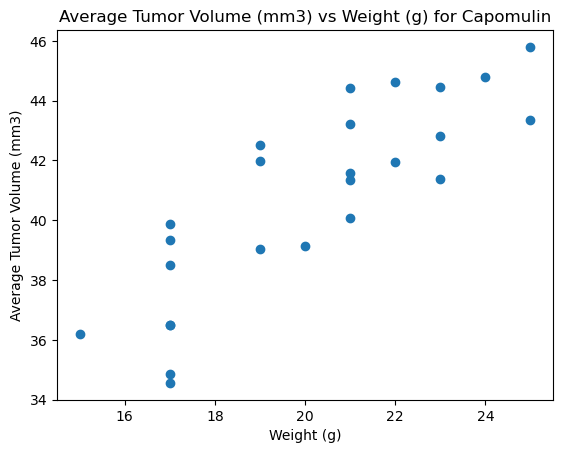

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Filter data for Capomulin group
capomulin_datamean = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Group by weight and calculate mean volume
group_weight_vol = capomulin_datamean.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean().reset_index()

# Create scatter plot
plt.scatter(group_weight_vol['Weight (g)'], group_weight_vol['Tumor Volume (mm3)'])

# Set plot title and labels
plt.title('Average Tumor Volume (mm3) vs Weight (g) for Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

# Display plot
plt.show()

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Filter data for Capomulin
capomulin_datamean = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

 # Group by weight and calculate mean volume
group_weight_vol = capomulin_datamean.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean().reset_index()
group_weight_vol

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344
5,i557,24.0,44.805810
6,i738,20.0,39.141053
7,j119,23.0,44.465236
8,j246,21.0,43.216925
9,l509,21.0,44.434474


The correlation between the mouse weight and the average tumor volume is: 0.84


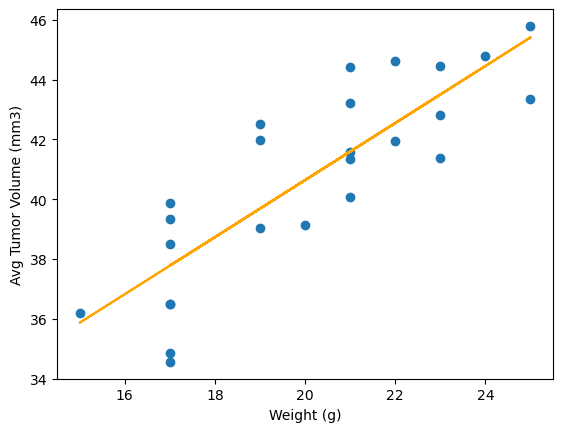

In [41]:
# TRY THIS
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(group_weight_vol["Weight (g)"], group_weight_vol["Tumor Volume (mm3)"])
print(f"The correlation between the mouse weight and the average tumor volume is: {round(correlation[0],2)}")

reg_model= st.linregress(group_weight_vol["Weight (g)"], group_weight_vol["Tumor Volume (mm3)"])
slope = reg_model[0]
b = reg_model[1]

y_values = group_weight_vol["Weight (g)"] * slope + b
plt.scatter(group_weight_vol["Weight (g)"], group_weight_vol["Tumor Volume (mm3)"])
plt.plot(group_weight_vol["Weight (g)"], y_values, color = "orange")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()